Loading model ...
1/1 [==============================] - 0s 252ms/step
True
1


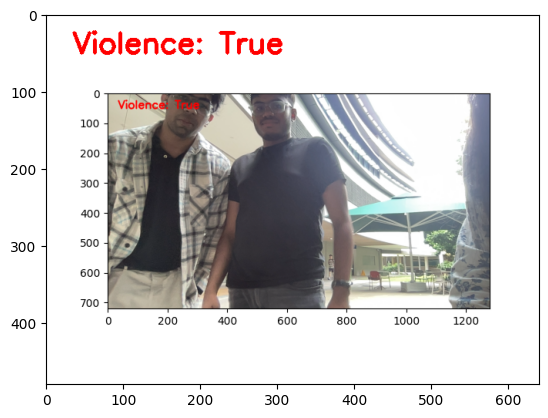

1/1 [==============================] - 0s 28ms/step
True
1


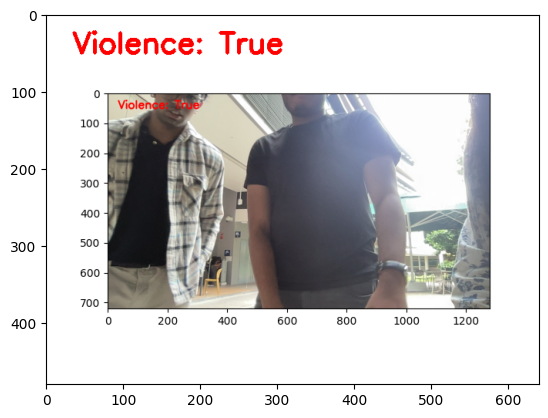

1/1 [==============================] - 0s 18ms/step
True
1


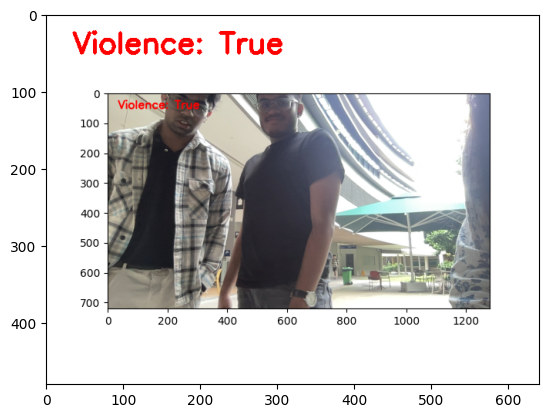

1/1 [==============================] - 0s 19ms/step
True
1


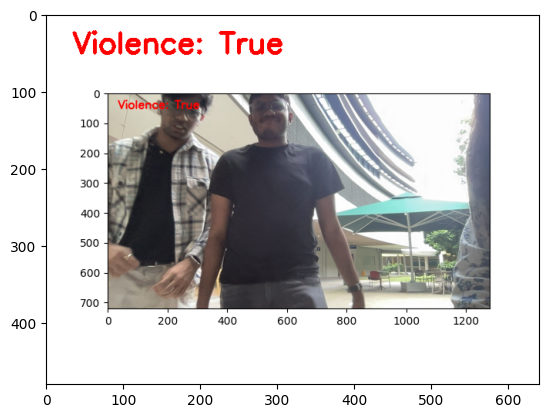

1/1 [==============================] - 0s 19ms/step
True
1


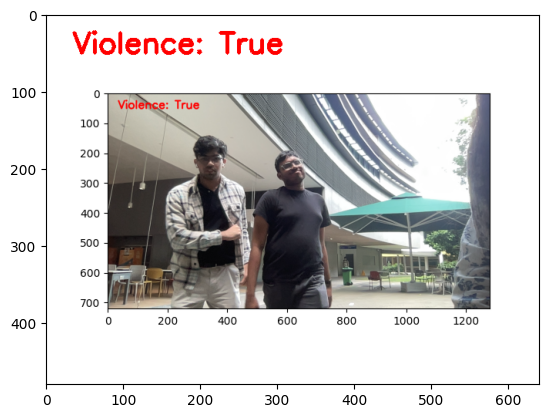

1/1 [==============================] - 0s 18ms/step
True
1


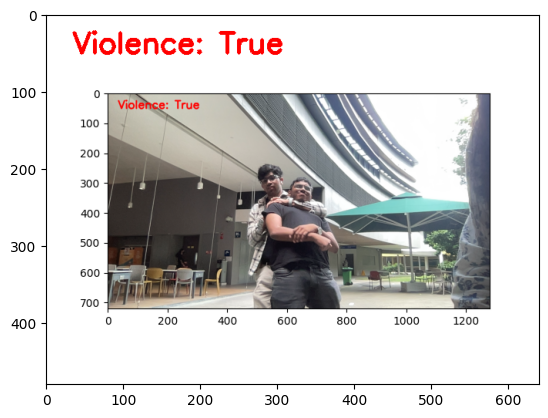

1/1 [==============================] - 0s 46ms/step
True
1


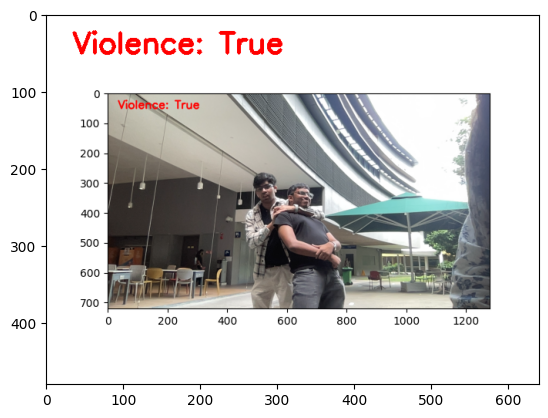

1/1 [==============================] - 0s 25ms/step
False
1/1 [==============================] - 0s 19ms/step
False
1/1 [==============================] - 0s 17ms/step
True
1


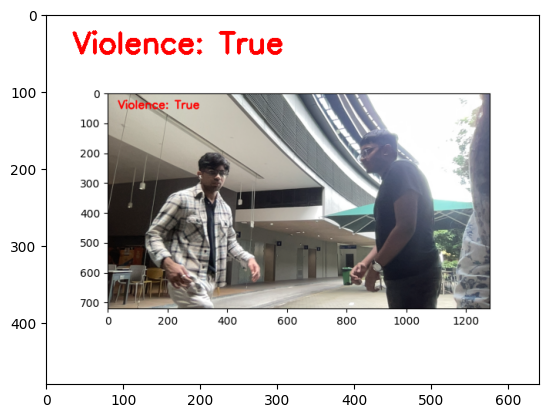

1/1 [==============================] - 0s 33ms/step
True
1


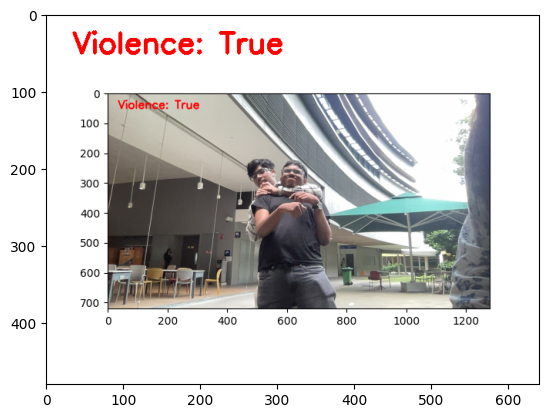

In [5]:
import numpy as np
import argparse
import pickle
import cv2
import os
import time
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt

if not os.path.exists('outputimg'):
    os.mkdir('outputimg')

print("Loading model ...")
model = load_model('/Users/faizahkureshi/Desktop/GAIP Project/modelnewimg.h5')
Q = deque(maxlen=128)
dir = '/Users/faizahkureshi/Desktop/GAIP Project/output'
counter = 0

for filename in os.listdir(dir):
    file_path = os.path.join(dir, filename)
    # Check if the file is an image
    if os.path.isfile(file_path) and any(file_path.endswith(extension) for extension in ['.jpg', '.jpeg', '.png']):
        # Read the image using OpenCV
        image = cv2.imread(file_path)
        output = image.copy()

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128)).astype("float32")
        image = image.reshape(128, 128, 3) / 255

        # Make predictions on the frame
        preds = model.predict(np.expand_dims(image, axis=0))[0]
        Q.append(preds)
        results = np.array(Q).mean(axis=0)
        i = (preds > 0.50)[0]
        label = i
        print(i)

        if label: # Violence prob
            text_color = (0, 0, 255) # red

        if label:
            print("1")
            text = "Violence: {}".format(label)
            FONT = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(output, text, (35, 50), FONT, 1.25, text_color, 3)

            # Save the output image
            cv2.imwrite(f"outputimg/output_{counter}.jpg", output)

            # Show the output image
            plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
            plt.show()
            counter += 1
